# 고양이 수염을 얼굴에 붙여보자!!

## 수행기간 
2021.01.12 ~ 2021.01.12

## 요약정리
1. 패키지 설치
2. 이미지 읽기 및 리사이징 / rgb 변환
3. hog dectector 와 landmark를 통해 얼굴 영역과 이목구비 찾아내기
4. landmark로 코 위치 찾기 및 고양이 수염 출력 위치 지정
5. 고양이 수염 출력 및 바운더리와 랜드마크 제거


### 후기
어렵당!!   
다른 것은 다 이해했는데 imshow 부분에서 이미지 출력 부분을 정의하는 곳이 아직 이해가 안된다.   
refined_y = 0 이었기 때문에 생략했었고, 이를 추가해줘서 다시 정의하는 것은 알겠는데,   
저 함수 자체가 익숙하지 않아서 이해가 안된달까...    
그래도 기본 개념은 잡았다.. 라기 보다 잡을 뻔 한 느낌이다.

#### 아쉬운 점
이상하게 내 얼굴은 hog detector로 못 찾아내는 것 같다...?!   
사실 제대로 인식하는 사진을 찾기 위해서 2번 정도 사진을 바꿨다.   
아마도 눈이 작아서 그런가봉가....    
눈이 작다기 보다는 사진 안에서의 밝기 변화가 크지 않아서 그런 것 같다.(원리상으로 생각해보면)   
실제로 인식이 잘 되지 않았던 것은 필름 카메라로 찍은 것이 많았는데, 아마도 그런 것도 연관이 있지 않을까 싶다.

In [129]:
# 패키지 설치 및 작동 확인
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


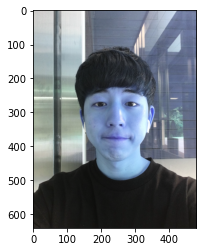

In [130]:
# 준비한 이미지 읽기 및 리사이징
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/new.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (480, 640))    # 360x640의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

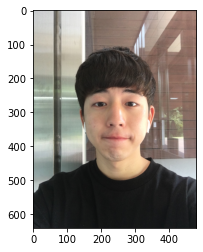

In [131]:
# BGR -> RGB로 변환 (opencv는 bgr로 읽는다.)
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요.

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # 변환!!
plt.imshow(img_rgb)
plt.show()

In [132]:
# hog detector 선언 --> 얼굴모양을 스케치 하는 느낌으로 찾기~ (이미지 밝기와 상관없이 찾아낼 수 있다. / 벡터 이용)
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언 / 객체 생성
print("🌫🛸")

# 얼굴 찾아내기 전 bgr -> rgb 변환 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)# 변환!!
dlib_rects = detector_hog(img_rgb, 1) # 1은 알파채널까지 읽겠다는 이야기!!   
#- (image, num of img pyramid)
print("🌫🛸")

🌫🛸
🌫🛸


rectangles[[(142, 217) (365, 440)]]


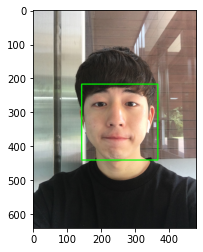

In [133]:
# 얼굴영역 사진에 표시하기

print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [134]:
# 이목구비를 찾기 위해 landmark 학습데이터 불러오기

import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [135]:
# 얼굴에서 68개의 랜드마크 찾기 (이목구비를 표시하는 노란점)

list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


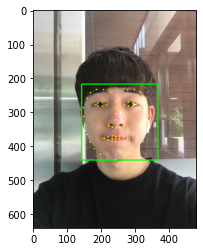

In [136]:
# 사진에 찾은 랜드마크 출력하기 (이목구비로 보이는 지점을 68개의 점으로 표시!)

for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 여기서부터는 코드를 고쳐야 한다.

코 중심점 :  (241, 322)
원래 코 위치에서 위로 상승 (x,y) : (241,210)
스티커 크기 (w,h) : (112,112)
===============================================================================1
스티커 shape :  (112, 112, 3)
===============================================================================2
이미지 시작점 (x,y) : (185,266)
===============================================================================3
===============================================================================4
바운더리 및 랜드마크 포함 출력


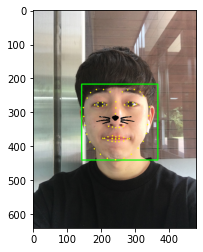

===============================================================================5
바운더리 및 랜드마크 제거 출력


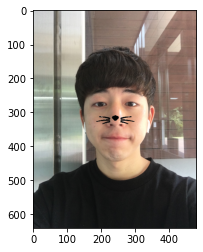

In [140]:
# 고양이 수염을 씌우기 위해 거리값 계산 (비율로 계산)

# 좌표 확인
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # nose center index : 30
    print ("코 중심점 : ",landmark[30]) # // 코 중심점
    x = landmark[30][0] # 코의 x축 위치
    y = landmark[30][1] - dlib_rect.width()//2 # 코의 y축 위치 - 스티커 위치만큼 위로
    
    # y값은 위에서부터 값이 시작하기 때문에 빼기(-)를 통해 스티커가 들어갈 위치를 높이는 것
    # dlib_rect.width()//2 은 스티커의 크기의 절반을 의미. 즉 코를 기준으로 전체 스티커 크기의 절반만큼 y축 상승 
    
    w = dlib_rect.width() // 2
    h = dlib_rect.width() // 2
    print ('원래 코 위치에서 위로 상승 (x,y) : (%d,%d)'%(x,y))
    print ('스티커 크기 (w,h) : (%d,%d)'%(w,h))

    
print("===============================================================================1")
    
# 사진에 맞게 수염 이미지 리사이징
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print ('스티커 shape : ',img_sticker.shape)


print("===============================================================================2")


# 스티커 이미지를 추가하기 위해 x,y좌표 조정 -> 음수값이 출력되었다면 스티커 범위가 사진 범위를 넘은 것
# 이미지의 시작점은 top-left 지점이다.

refined_x = x - w // 2  # left
refined_y = y + h // 2  # top


print ('이미지 시작점 (x,y) : (%d,%d)'%(refined_x, refined_y))
# 여기서 시작해야 이미지 크기를 계산했을 때, 코 위에 올 수 있음.


print("===============================================================================3")


# 원본 이미지에 스티커 적용 

# sticker_area 0이 아니기 때문에 refined_x 처럼 refined _y 도 더해주어야 한다.
sticker_area = img_show[refined_y:refined_y + img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

print("===============================================================================4")


# 결과 이미지 출력 -> 바운더리 및 랜드마크 함께 출력
print("바운더리 및 랜드마크 포함 출력")
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

print("===============================================================================5")

# 바운더리 및 랜드마크 제거
print("바운더리 및 랜드마크 제거 출력")
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

